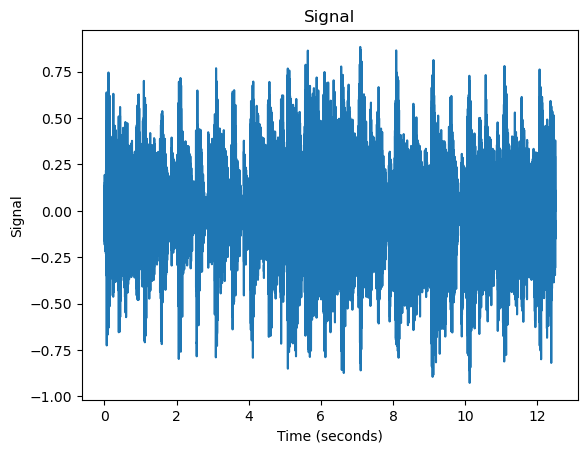

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import sounddevice as sd
import librosa

# Φόρτωση του αρχείου WAV. Η επιλογή αρχείου εξαρτάται απο το ποια εντολή θα υπάρχει στα σχόλια

#signal, sr = librosa.load('speech_utterance.wav', sr = 16000)
#fs = 16000
signal, sr = librosa.load('music.wav', sr = 48000)
fs = 48000

input_length = len(signal)
time = np.arange(input_length) * (1/fs)

plt.figure()
plt.plot(time, signal)
plt.title('Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Signal')
plt.show()

sd.play(signal, fs)
sd.wait()

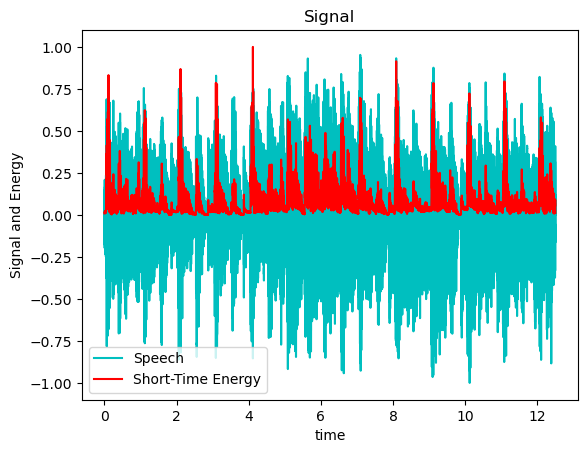

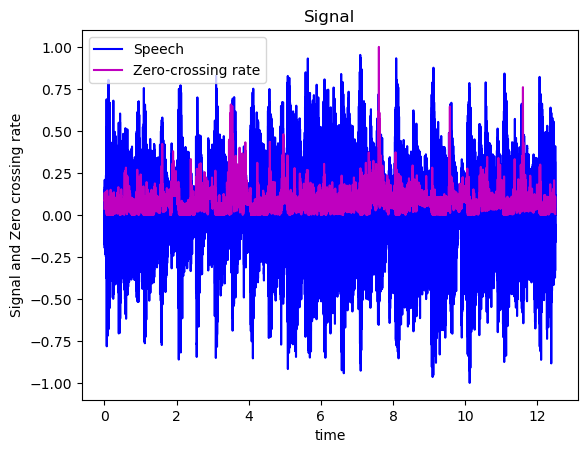

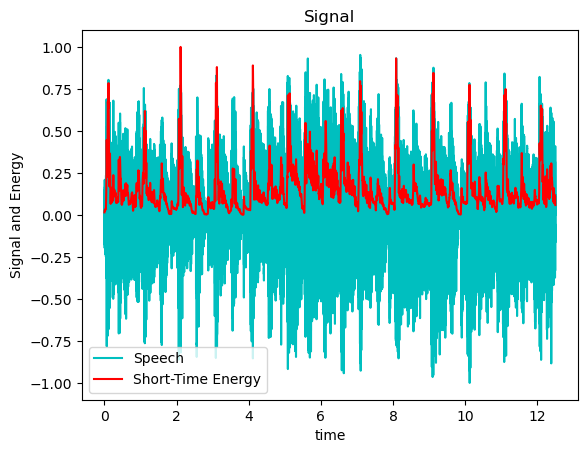

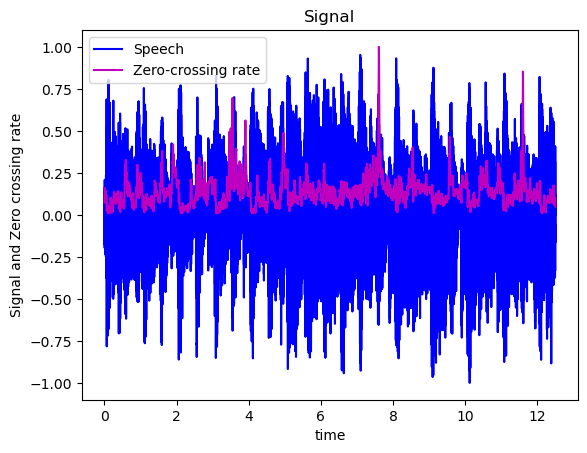

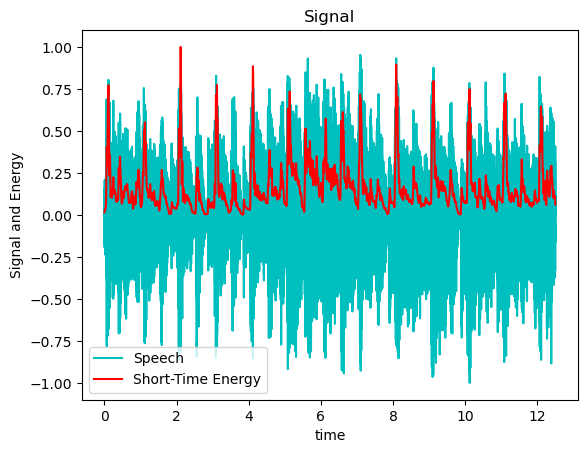

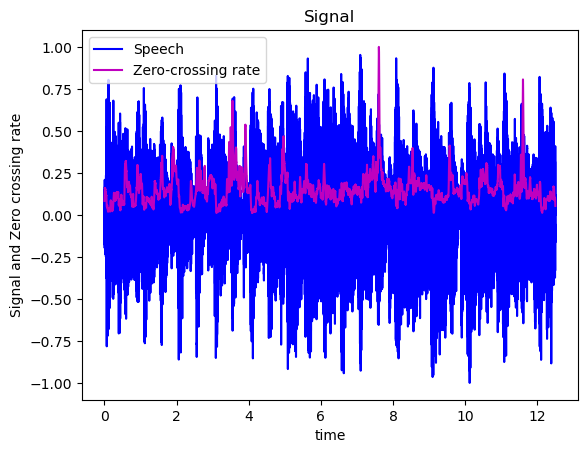

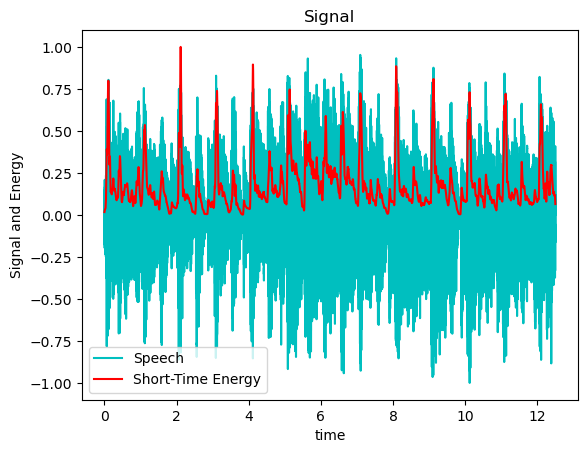

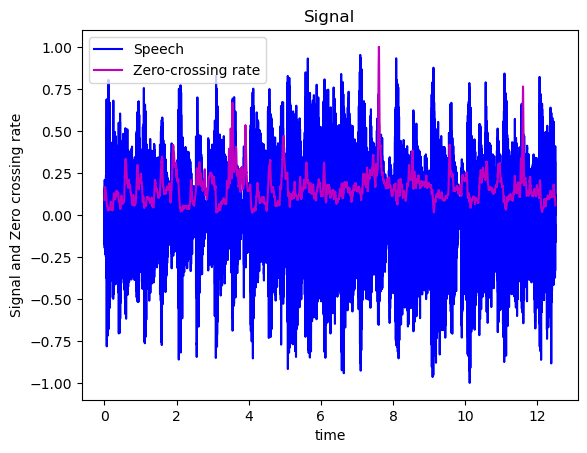

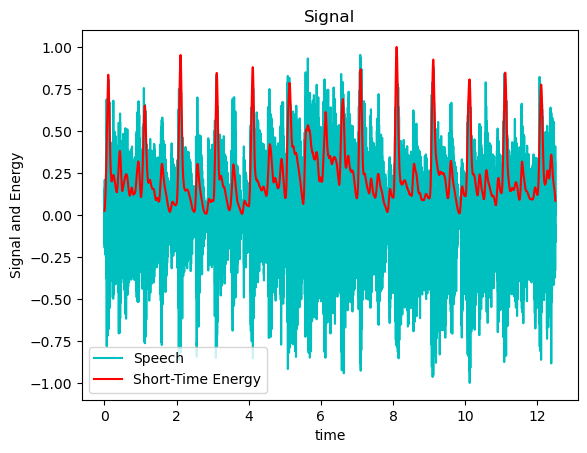

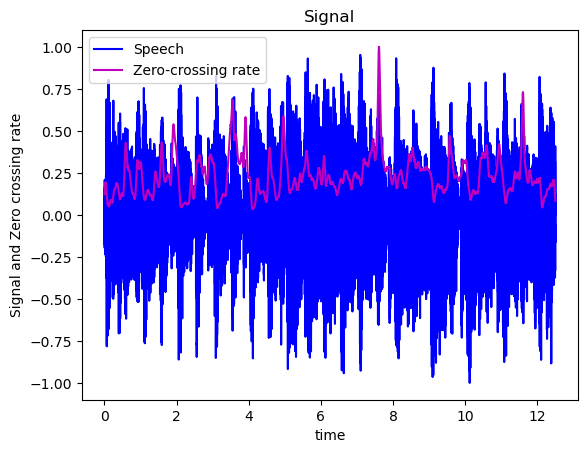

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import librosa.display
from scipy.signal import convolve


def short_time_energy(x, window):
    sq_x = x ** 2
    result = convolve(sq_x, window, mode = 'same')
    return result

def sign_difference_energy(x, window):    
    sgn = np.sign(x)
    diff = np.abs(np.diff(sgn, prepend=sgn[0]))
    result = convolve(diff, window, mode='same')
    return result


window_lengths = np.array([0.005*fs, 0.02*fs, 0.03*fs, 0.04*fs, 0.1*fs])

Energy = np.zeros((5, input_length))
Zero_cross = np.zeros((5, input_length))
    
for i in range(0, 5) :
    chosen_length = window_lengths[i]
    window = np.hamming(chosen_length)
    
    Energy[i] = short_time_energy(signal, window) 
    Zero_cross[i] = sign_difference_energy(signal, window)

    max_signal = np.max(np.abs(signal))
    max_Energy = np.max(Energy[i, :])
    plt.figure()
    plt.plot(time, signal / max_signal, 'c', label='Speech')
    plt.plot(time, Energy[i, :] / max_Energy, 'r', label='Short-Time Energy')
    plt.legend()
    plt.title('Signal')
    plt.xlabel('time')
    plt.ylabel('Signal and Energy')
    plt.show()

    max_Zero_crossing = np.max(Zero_cross[i, :]) 
    plt.figure()
    plt.plot(time, signal / max_signal, 'b', label='Speech')
    plt.plot(time, Zero_cross[i, :] / max_Zero_crossing, 'm', label='Zero-crossing rate')
    plt.legend()
    plt.title('Signal')
    plt.xlabel('time')
    plt.ylabel('Signal and Zero crossing rate')
    plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_27860\4172858742.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (15, 5))


ValueError: nfft must be greater than or equal to nperseg.

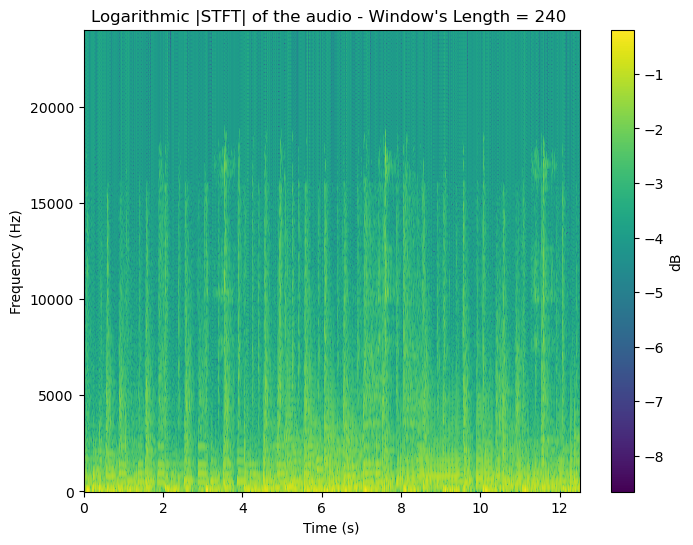

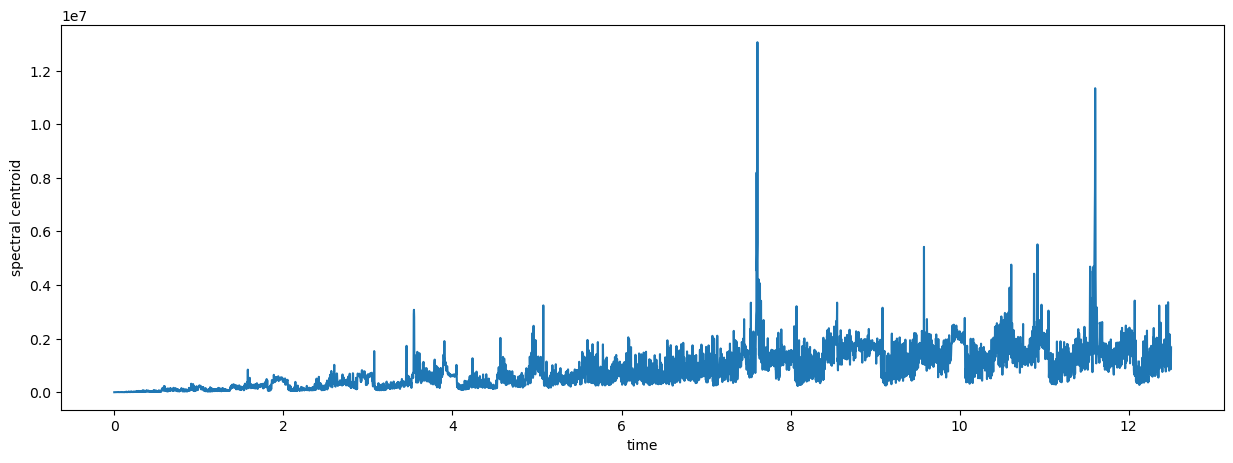

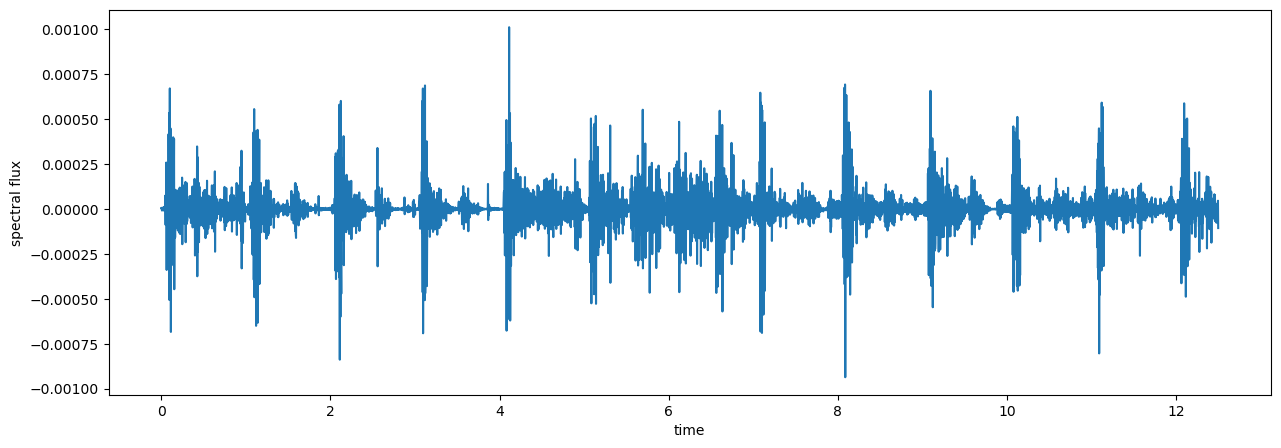

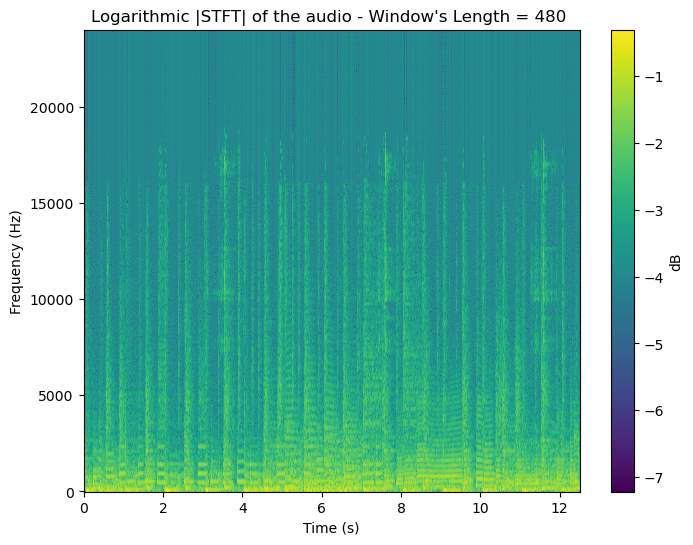

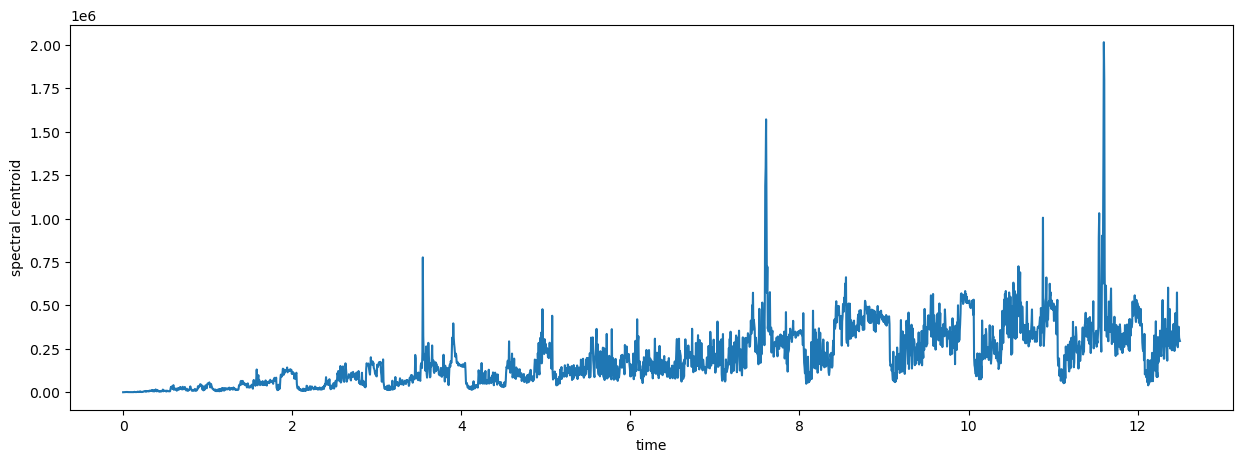

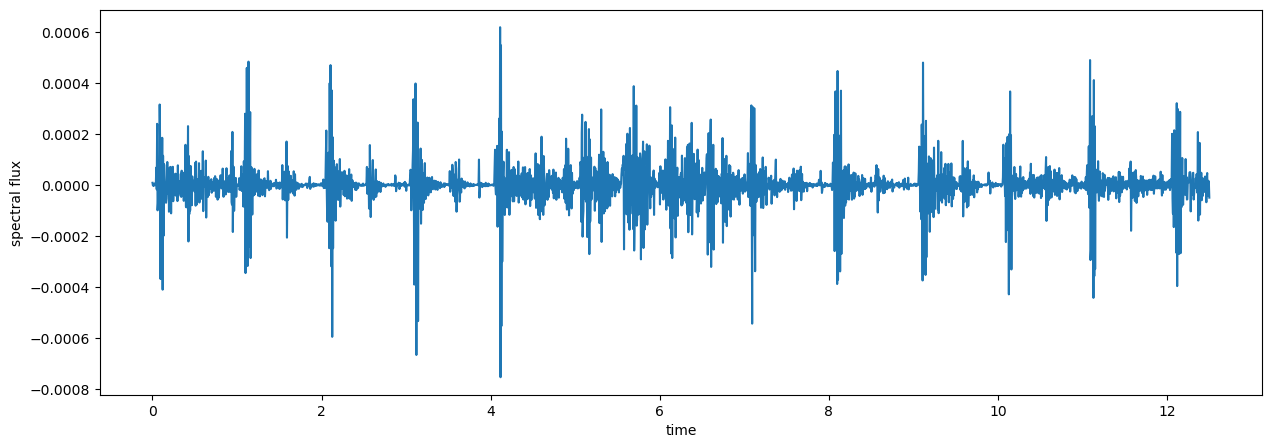

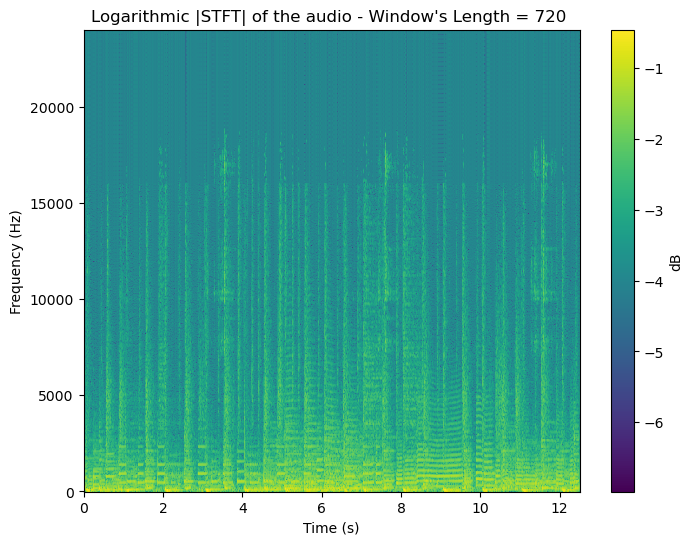

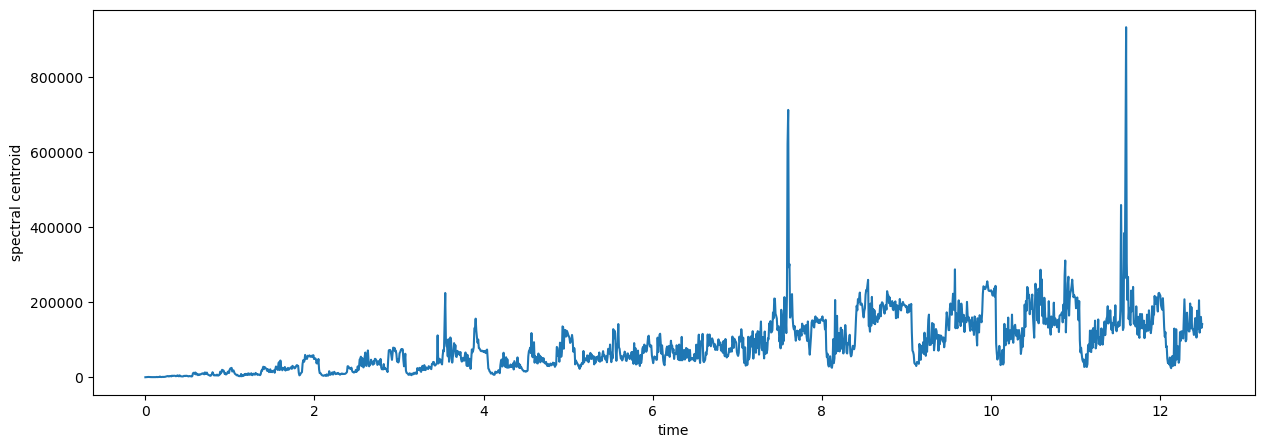

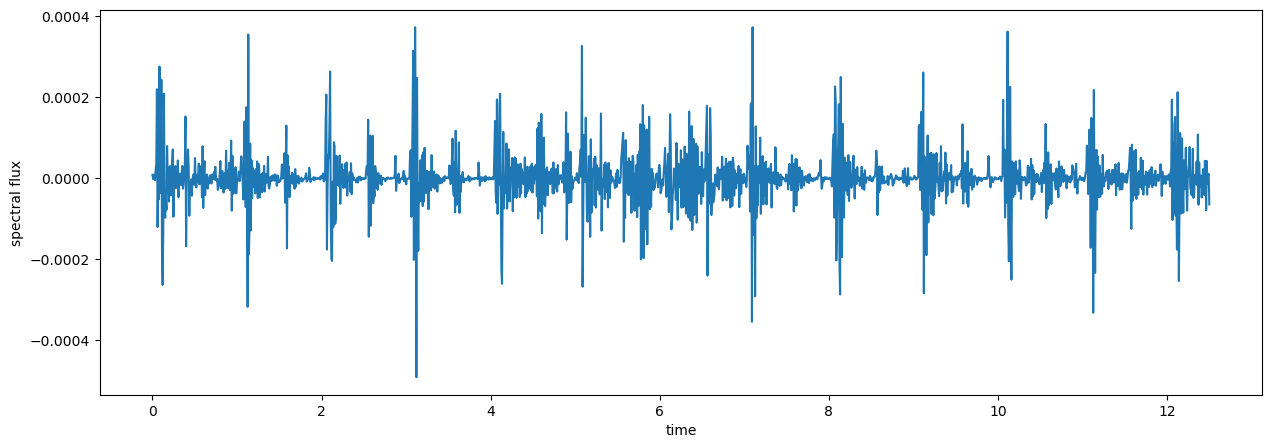

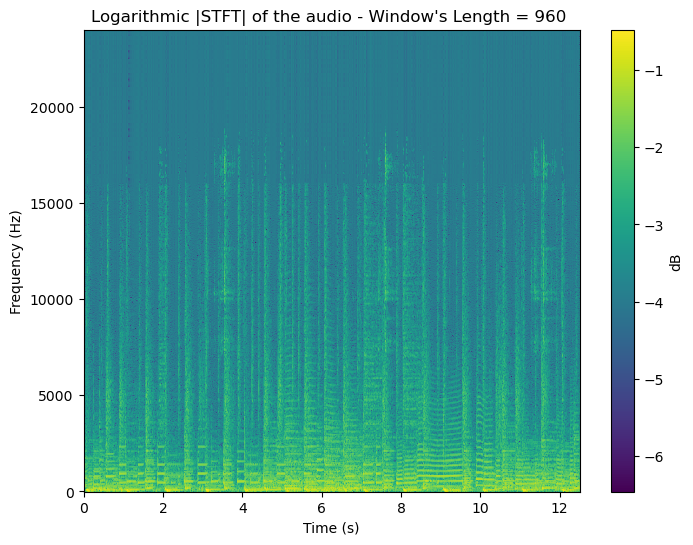

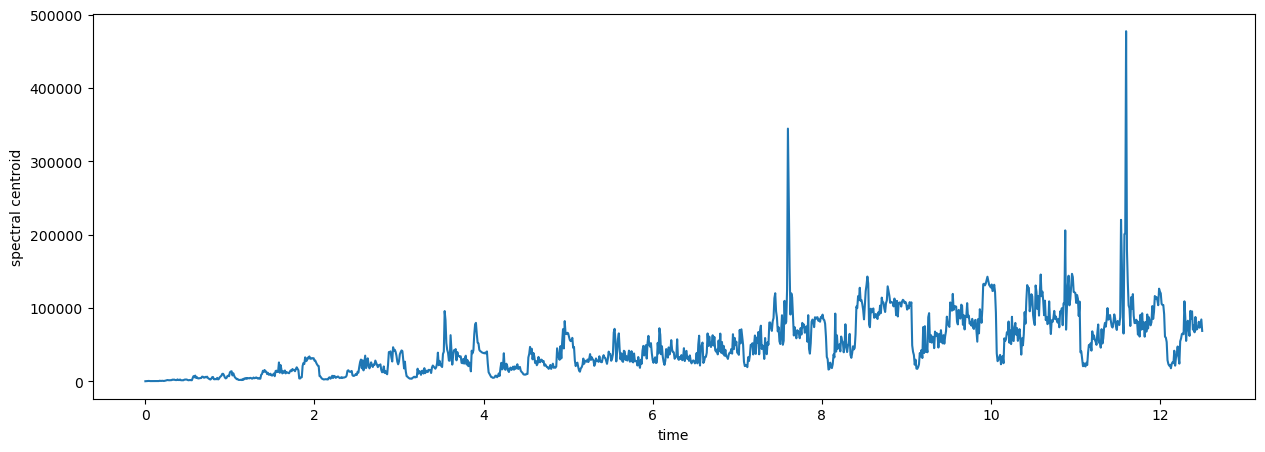

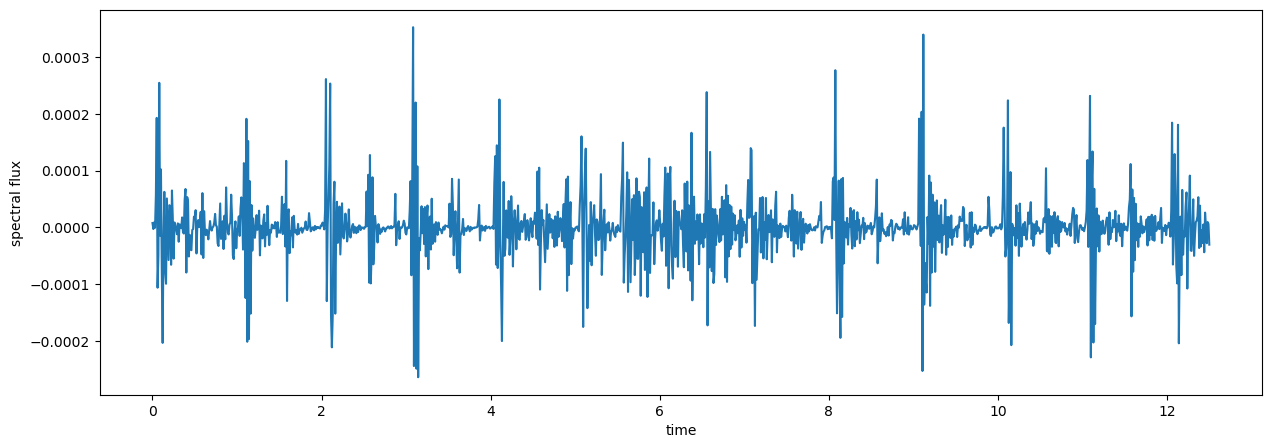

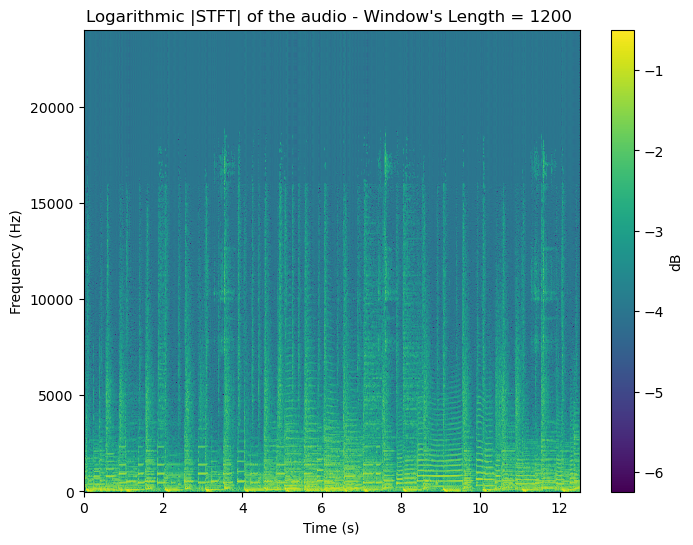

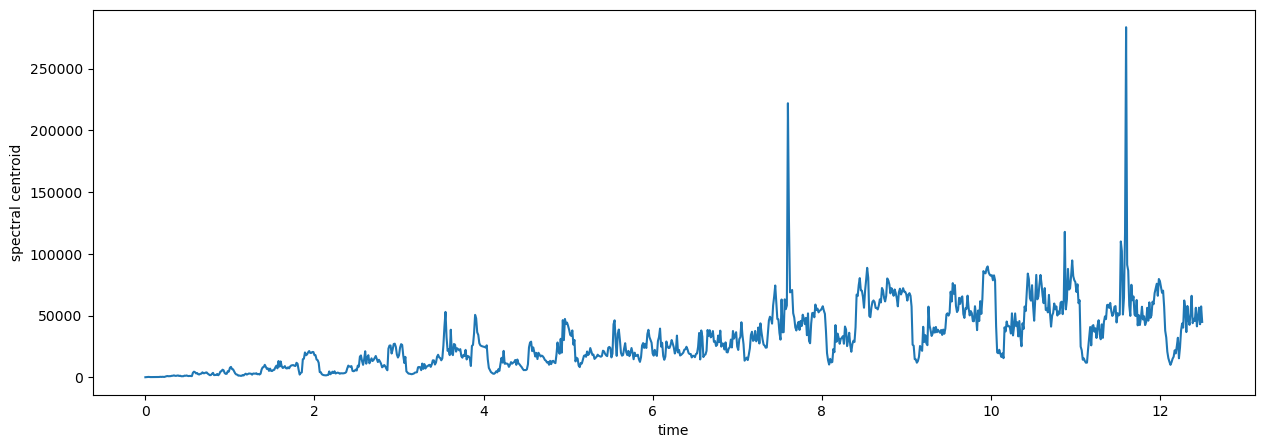

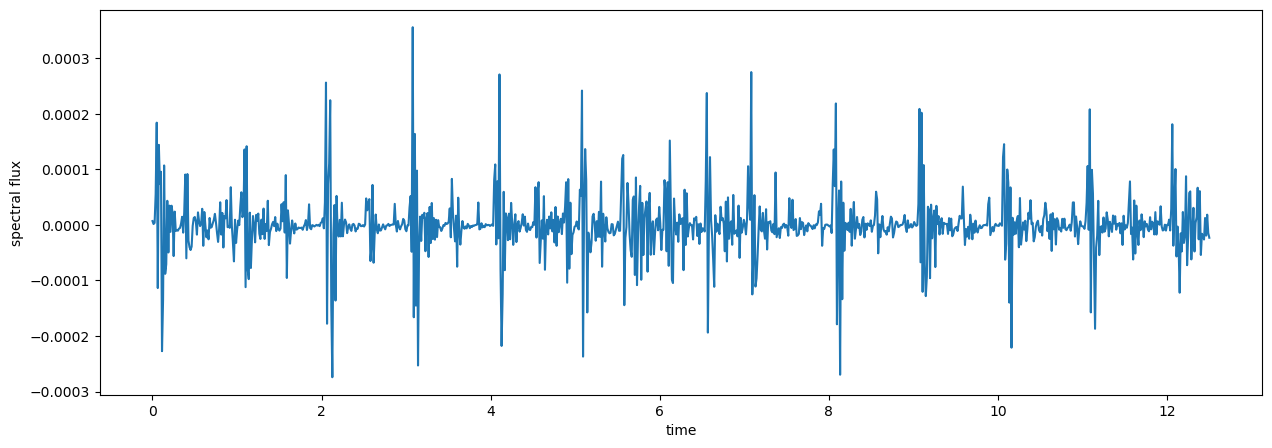

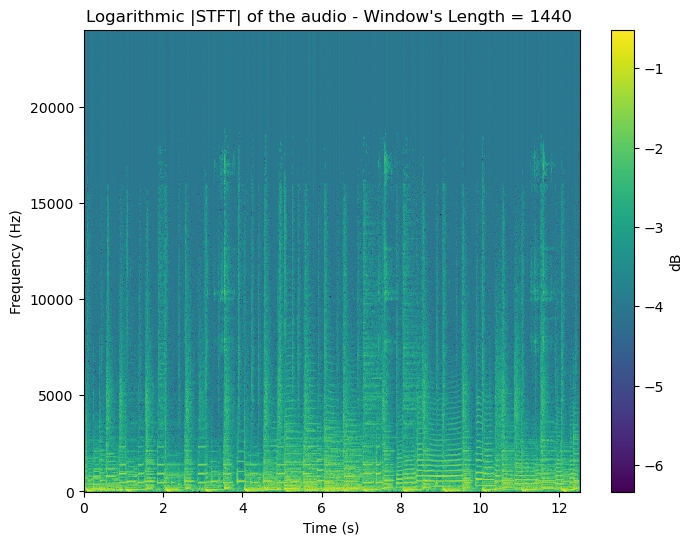

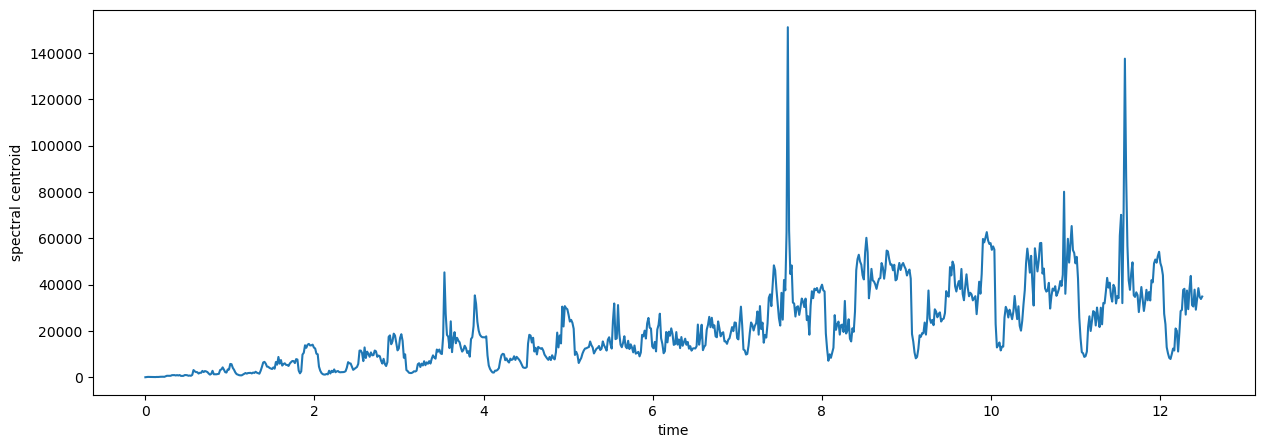

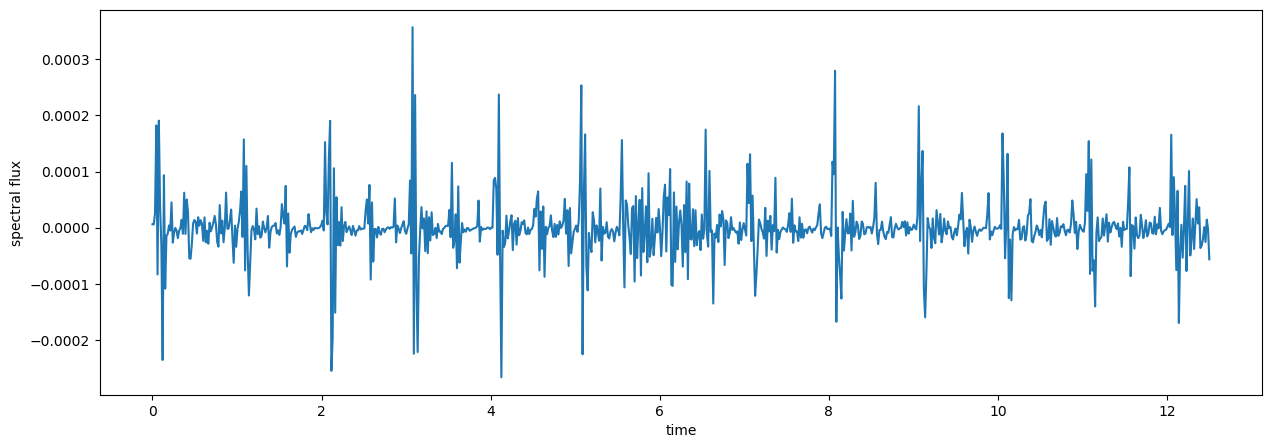

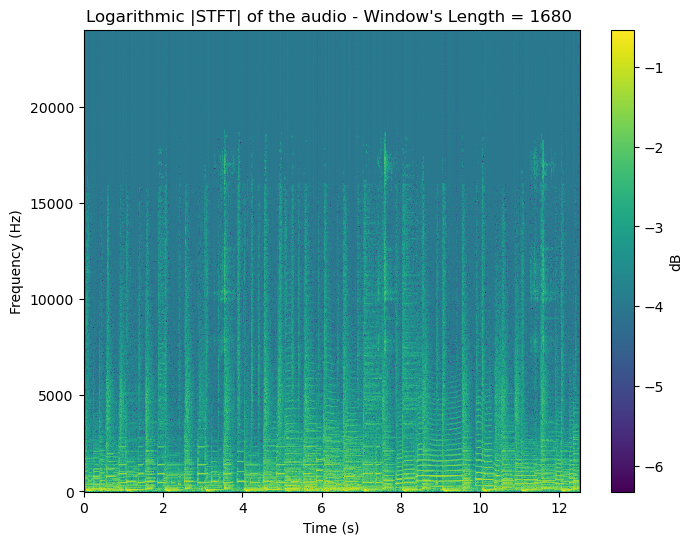

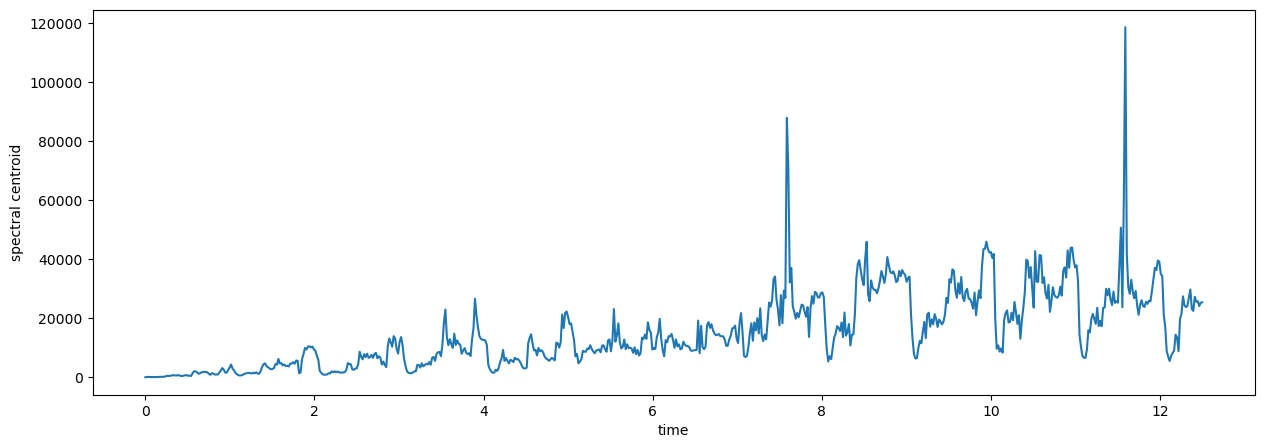

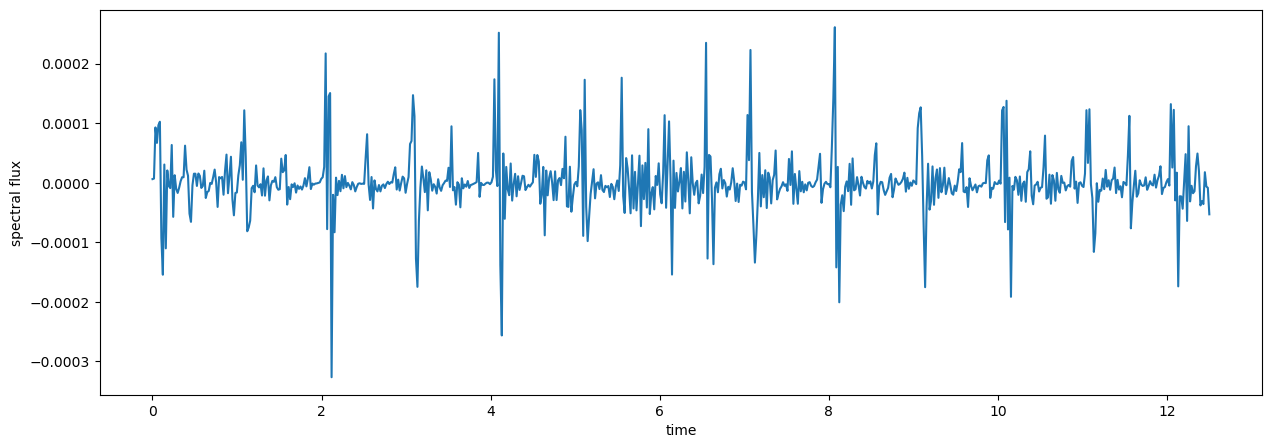

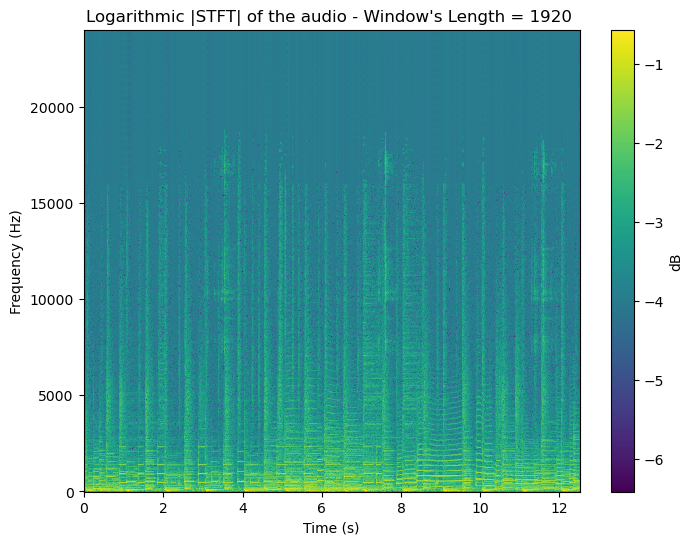

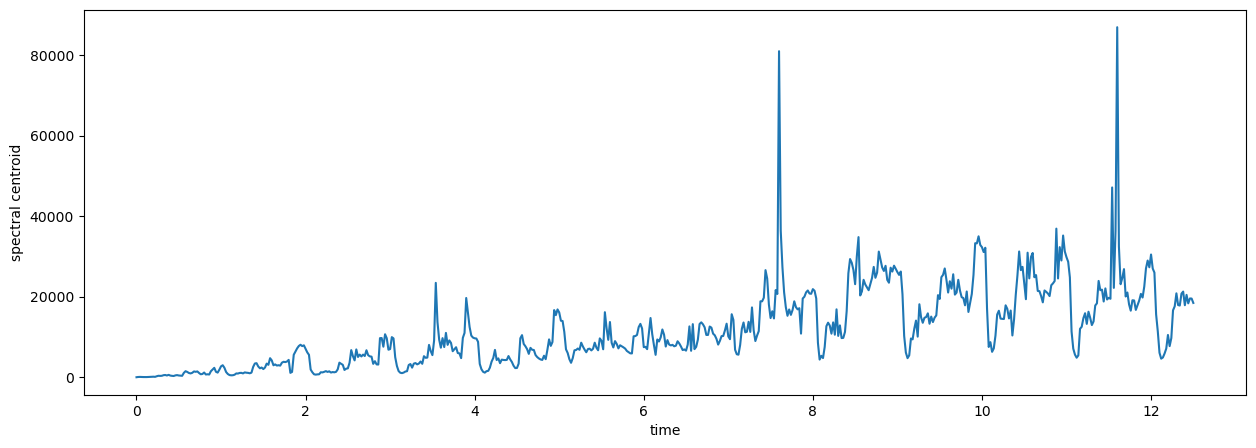

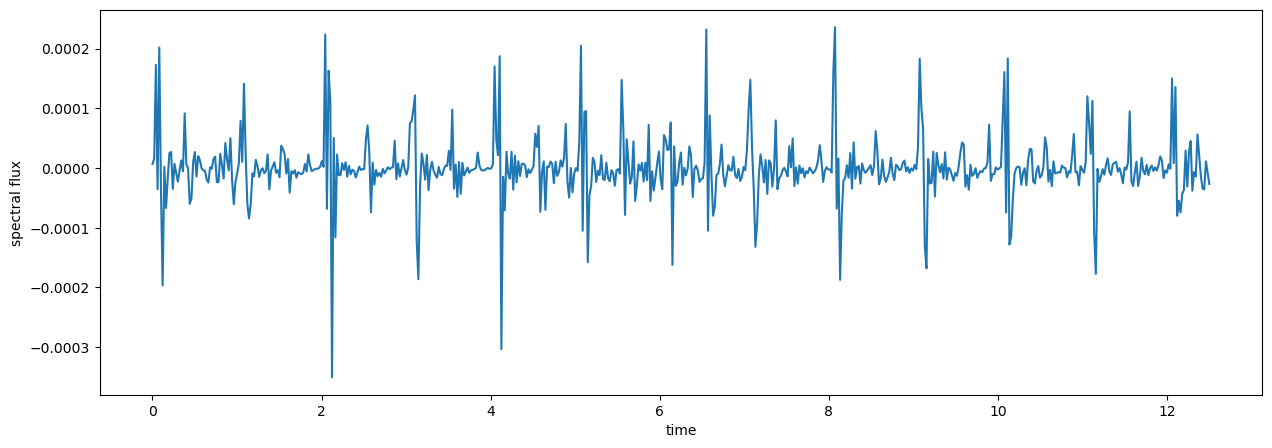

In [3]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
 
def spectral_centroid(X):
    PN = X.shape[1]  
    N = X.shape[0]   
    sum_k_X = np.sum(np.arange(N)[:, np.newaxis] * np.abs(X)**2, axis=0)
    sum_X = np.sum(np.abs(X)**2, axis=0)
    SCm = sum_k_X / sum_X * (PN / 2) * (np.arange(PN) * 2 * np.pi * PN / N) / PN
    return SCm

def spectral_flux(X):
    PN = X.shape[1] 
    squared_diff = np.diff(np.abs(X)**2, axis=1)
    SFm = np.sum(squared_diff, axis=0) / (PN / 2)
    return SFm

L=int(fs*0.005) 
max_length = int(fs*0.045) 
while(L <= max_length):  
    freq,times,STFT = sp.signal.stft(signal,fs,window='hamming',nperseg=L,nfft=2048)
    plt.figure(figsize = (8,6))
    plt.pcolormesh(times,freq, np.log10(np.abs(STFT + 0.0001)), cmap='viridis')
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label='dB')
    plt.title(f"Logarithmic |STFT| of the audio - Window's Length = {L} ")
    L += int(fs*0.005)
    y1 = spectral_centroid(STFT)
    y2 = spectral_flux(STFT)
    n1 = np.linspace(0, len(signal)/fs, len(y1))
    n2 = np.linspace(0, len(signal)/fs, len(y2))
    plt.figure(figsize = (15, 5))
    plt.plot(n1, y1)
    plt.xlabel("time")
    plt.ylabel("spectral centroid")
    plt.figure(figsize = (15, 5))
    plt.xlabel("time")
    plt.ylabel("spectral flux")
    plt.plot(n2, y2)

